## 7.1 Breakout 게임 실행하기

윈도우에서 breakout-v0을 실행하기 전에 먼저 아래 명령을 실행해두기 바란다.

pip install --no-index -f https://github.com/Kojoley/atari-py/releases atari_py

pip install atari-py

pip install opencv-python



In [4]:
# 구현에 사용할 패키지 임포트
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import gym


In [5]:
# 게임 시작
ENV = 'Breakout-v0'  # 태스크 이름
env = gym.make(ENV)  # 환경 설정


In [6]:
# 태스크에서 관측할 수 있는 상태와 선택 가능한 행동 파악하기

# 상태
print(env.observation_space)
# Box(210, 160, 3)

# 행동
print(env.action_space)
print(env.unwrapped.get_action_meanings())
# Discrete(4)
# ['NOOP', 'FIRE', 'RIGHT', 'LEFT']、 0: 아무것도 하지 않음, 1: 공을 발사, 2：오른쪽 이동, 3: 왼쪽 이동


Box(210, 160, 3)
Discrete(4)
['NOOP', 'FIRE', 'RIGHT', 'LEFT']


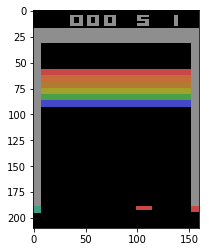

In [7]:
# 초기 상태를 이미지로 나타내기
observation = env.reset()  # 환경 초기화
plt.imshow(observation)  # 이미지 그리기


In [8]:
# 애니메이션을 만드는 함수
# 참고 URL http://nbviewer.jupyter.org/github/patrickmineault
# /xcorr-notebooks/blob/master/Render%20OpenAI%20gym%20as%20GIF.ipynb
from JSAnimation.IPython_display import display_animation
from matplotlib import animation
from IPython.display import display


def display_frames_as_gif(frames):
    """
    Displays a list of frames as a gif, with controls
    """
    plt.figure(figsize=(frames[0].shape[1]/72.0, frames[0].shape[0]/72.0),
               dpi=72)
    patch = plt.imshow(frames[0])
    plt.axis('off')

    def animate(i):
        patch.set_data(frames[i])

    anim = animation.FuncAnimation(plt.gcf(), animate, frames=len(frames),
                                   interval=50)

    anim.save('breakout.mp4')  # 애니메이션을 저장하는 부분
    display(display_animation(anim, default_mode='loop'))



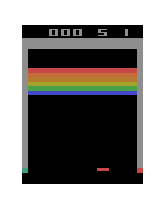
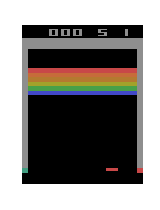
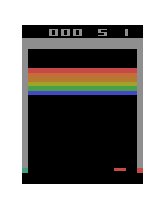
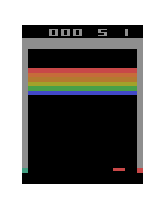
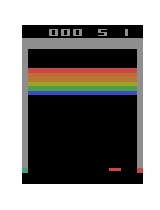
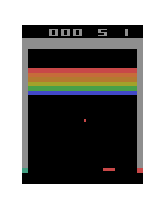
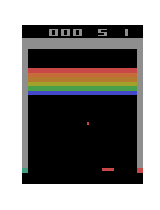
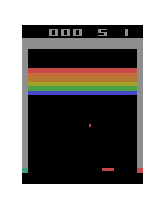
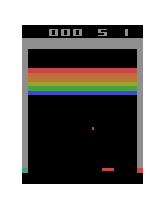
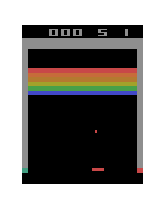
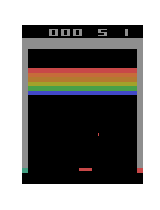
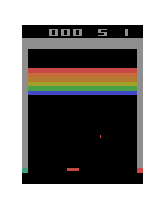
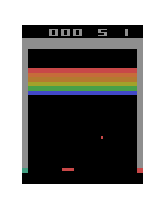
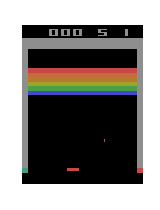
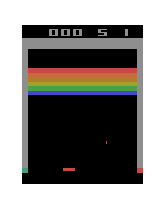
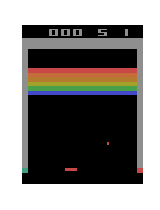
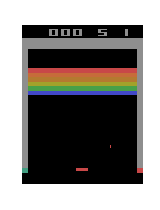
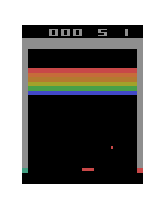
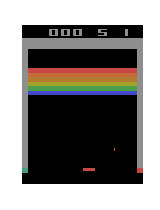
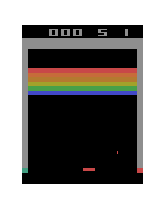
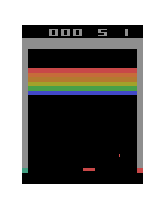
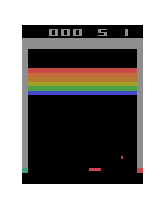
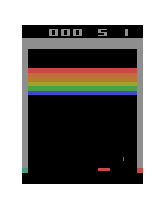
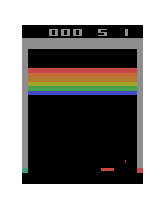
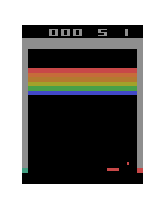
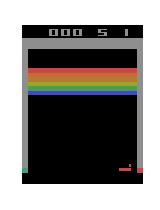
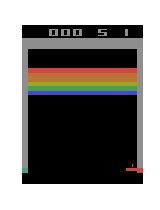
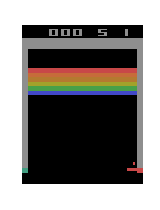
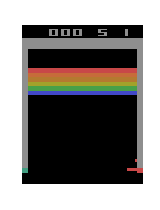
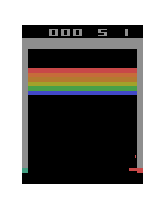
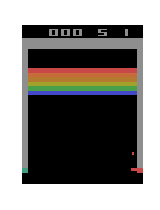
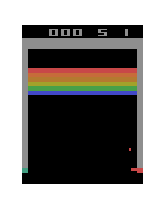
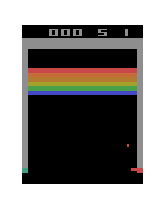
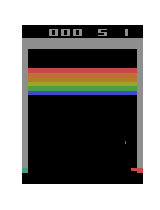
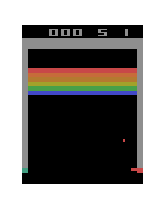
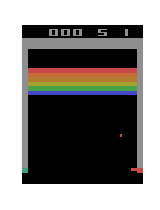
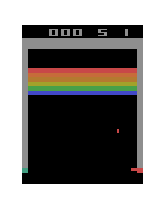
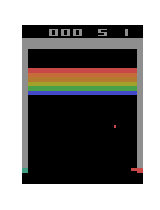
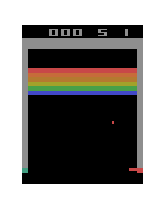
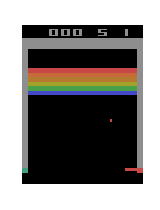
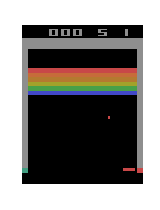
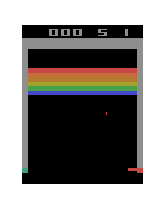
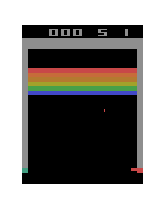
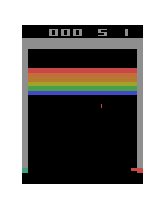
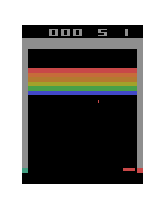
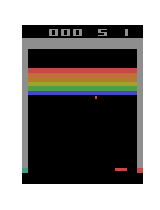
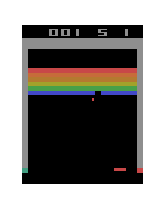
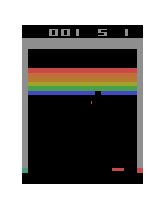
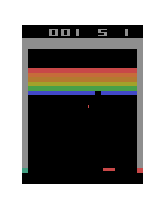
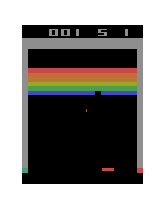
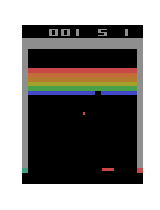
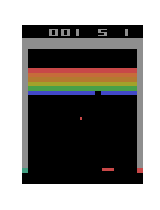
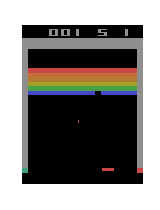
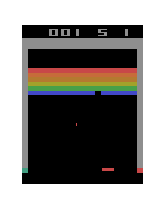
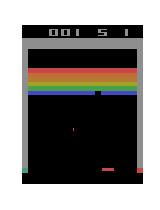
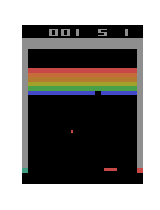
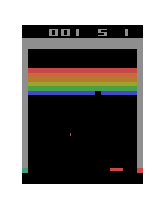
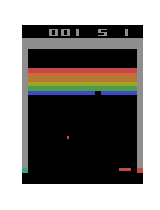
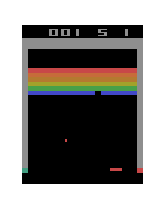
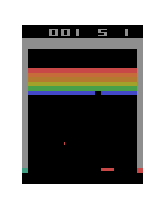
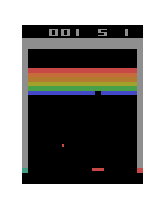
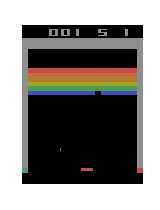
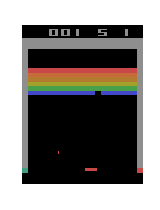
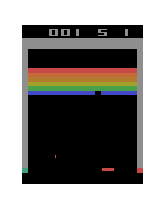
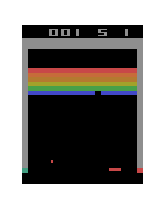
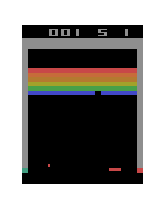
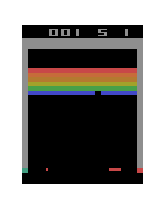
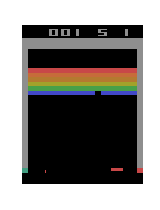
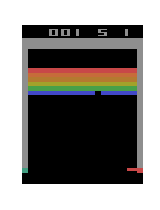
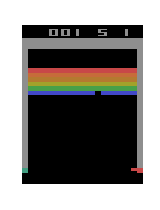
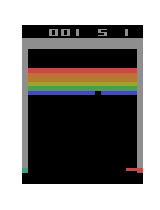
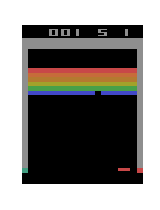
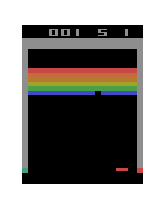
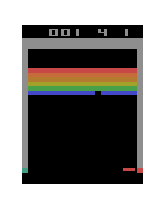
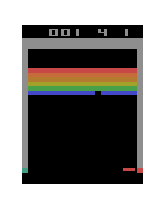
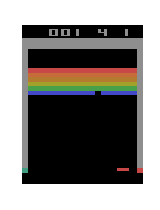
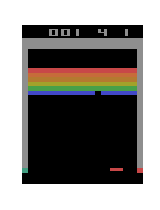
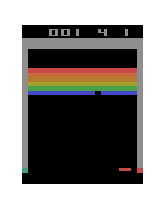
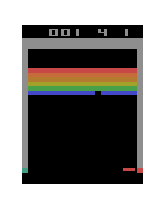
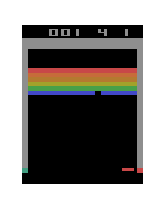
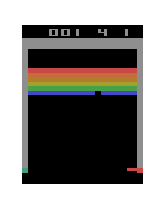
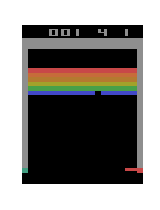
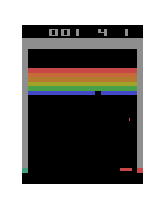
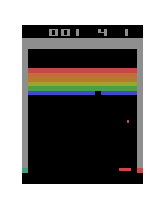
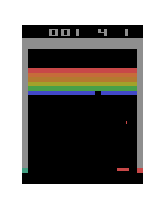
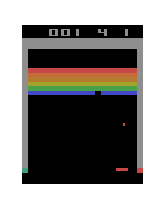
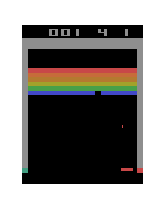
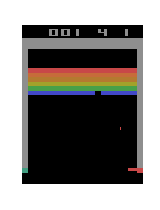
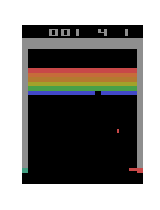
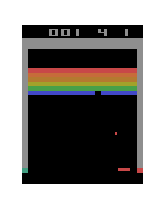
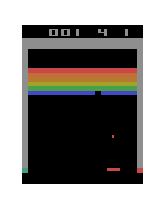
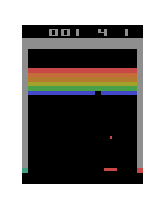
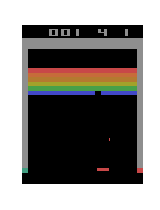
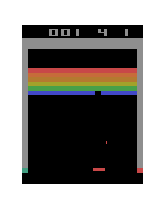
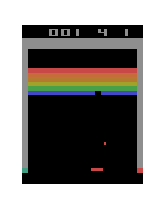
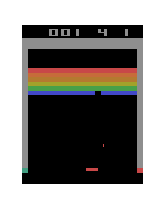
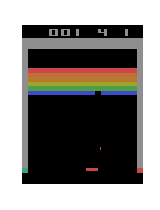
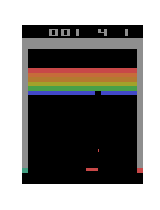
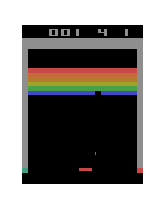
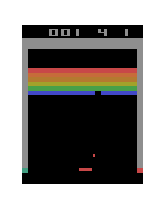
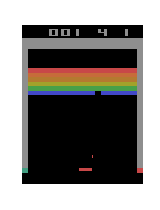
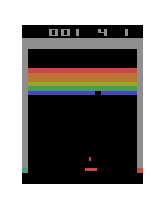
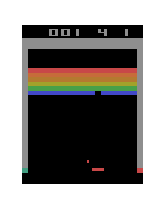
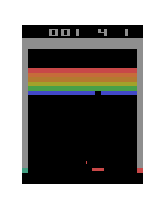
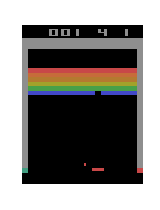
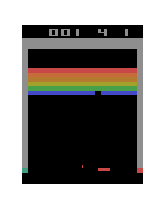
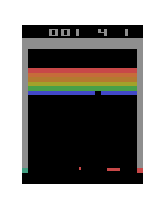
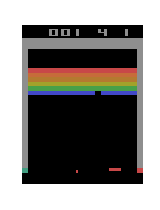
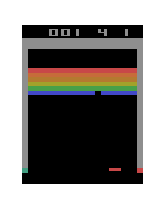
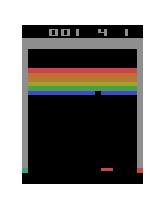
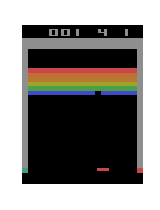
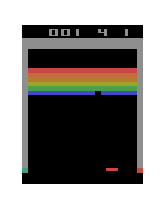
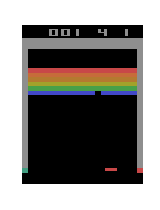
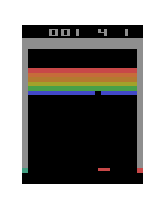
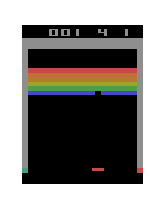
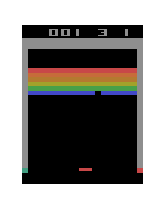
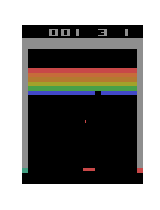
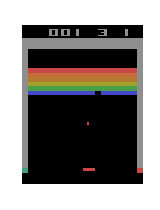
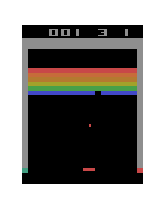
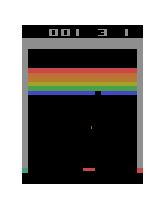
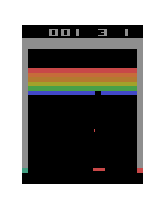
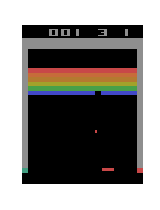
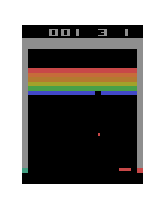
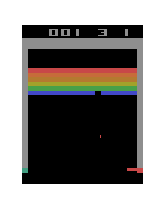
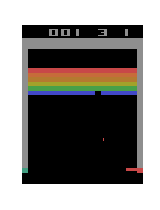
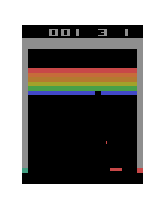
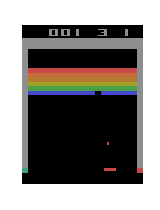
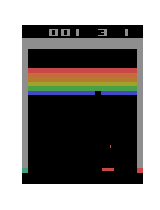
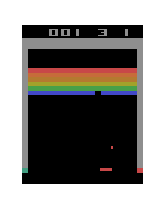
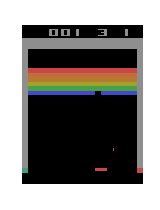
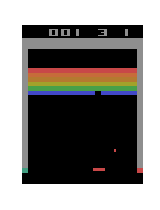
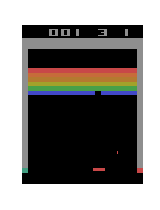
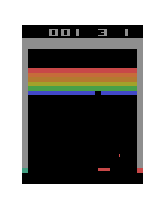
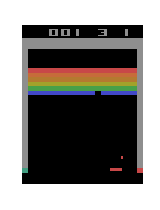
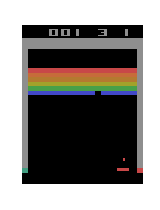
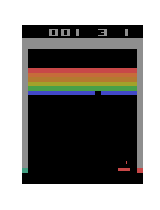
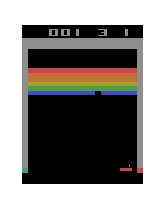
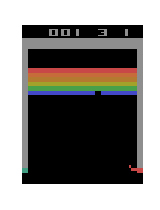
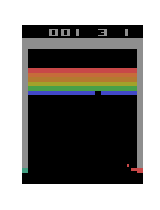
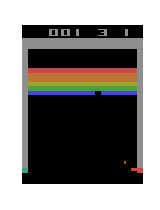
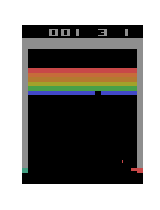
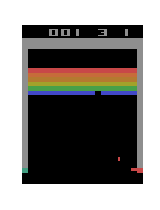
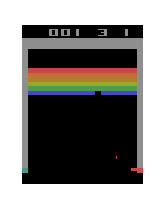
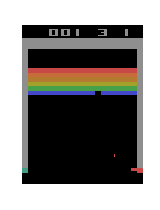
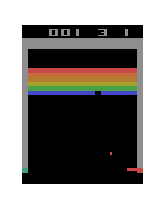
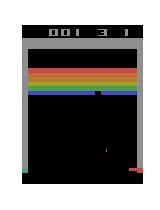
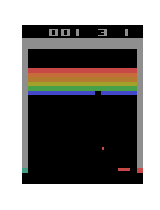
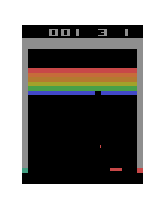
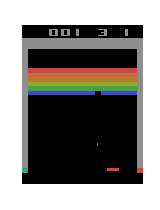
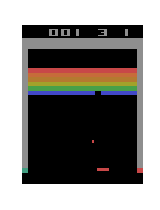
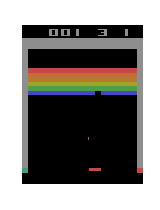
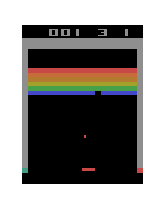
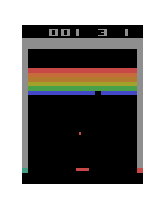
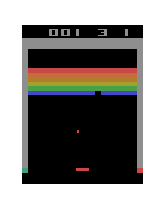
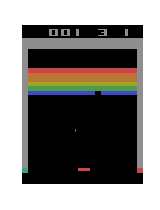
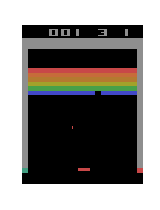
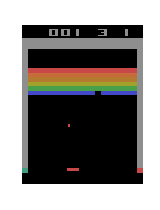
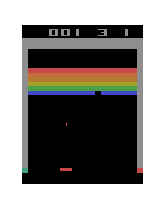
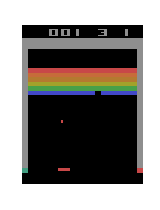
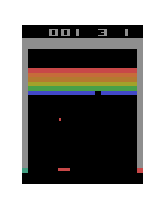
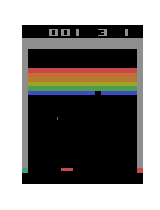
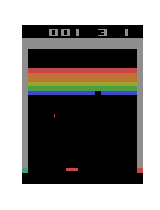
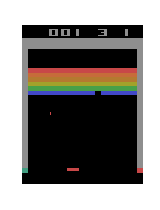
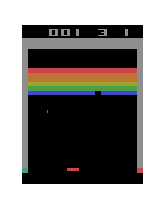
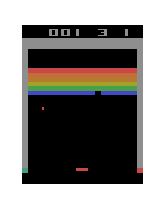
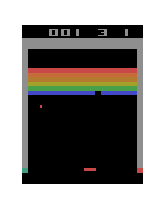
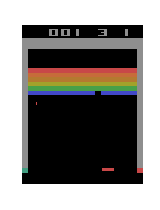
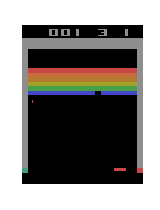
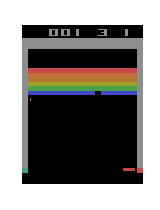
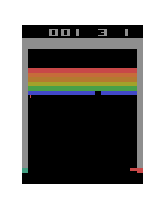
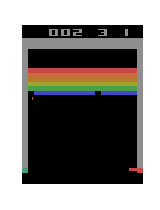
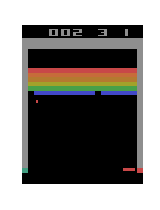
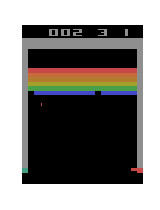
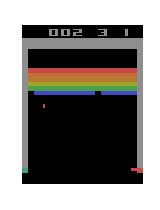
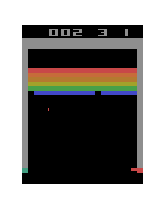
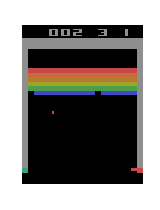
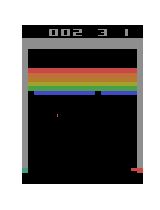
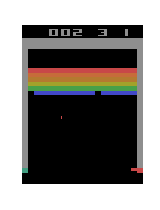
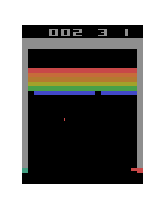
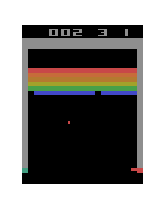
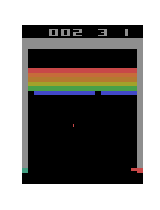
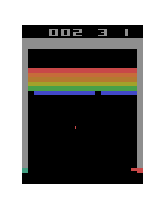
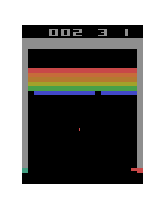
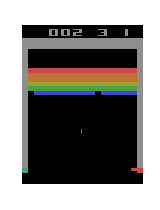
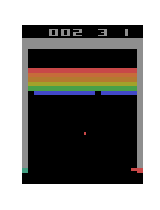
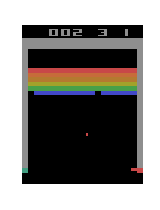
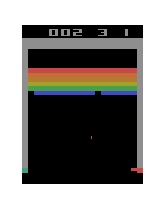
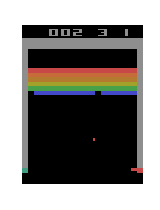
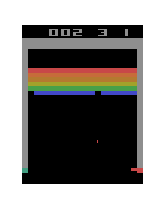
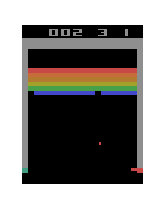
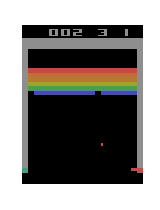
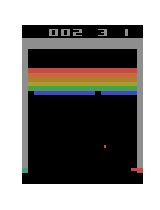
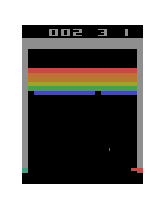
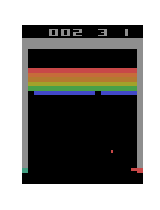
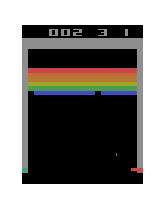
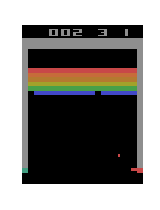
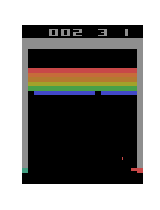
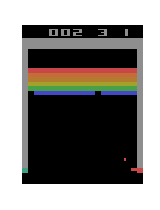
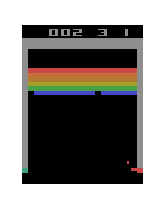
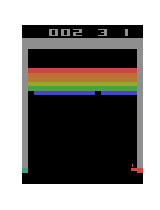
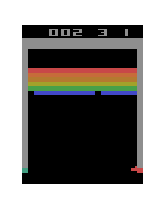
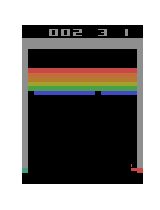
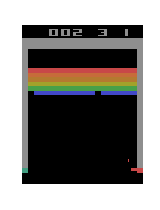
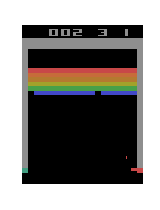
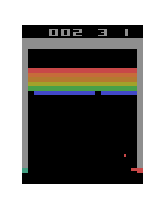
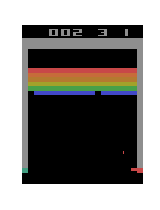
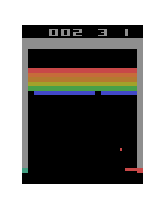
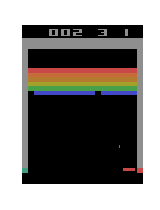
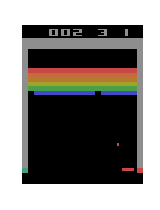
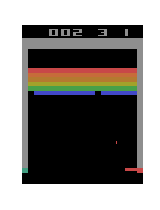
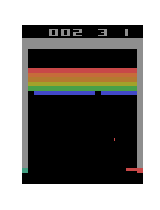
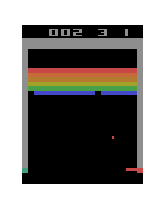
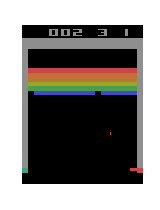
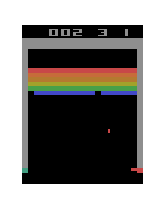
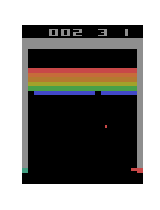
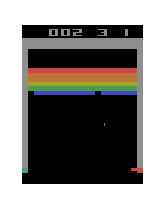
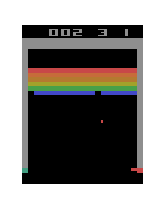
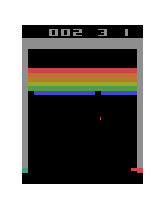
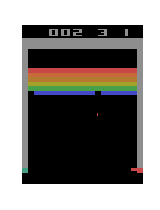
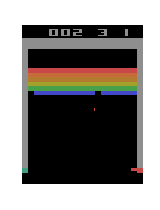
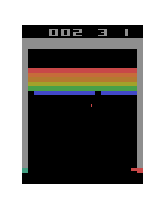
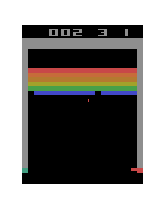
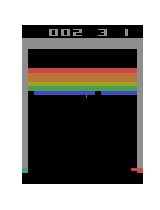
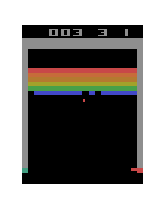
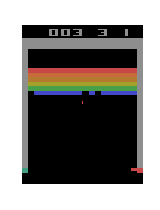
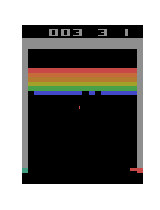
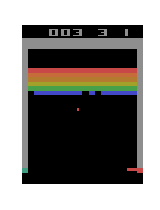
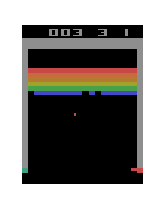
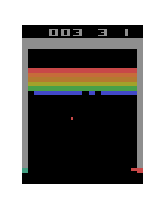
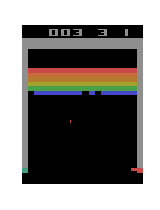
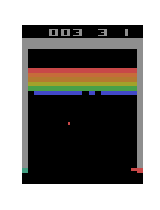
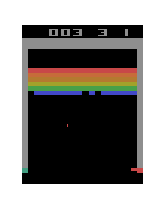
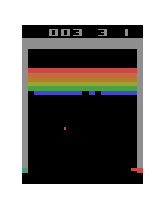
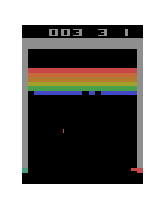
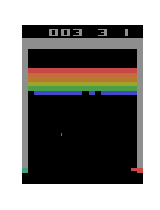
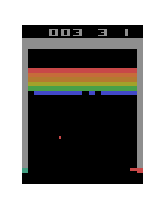
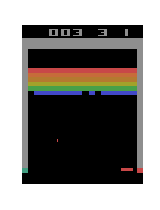
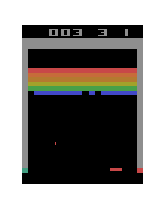
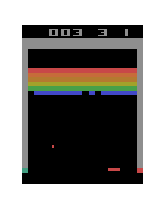
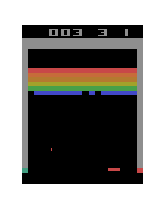
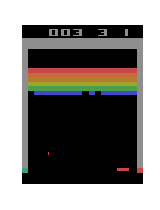
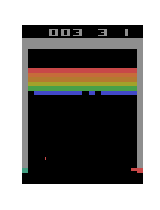
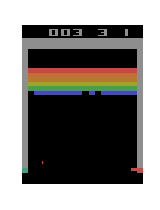
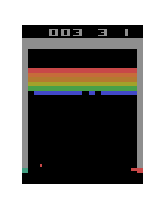
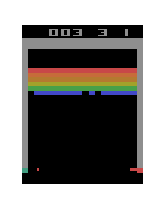
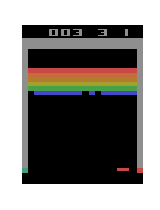
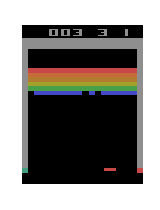
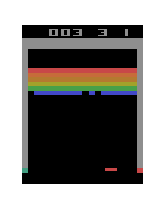
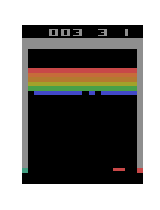
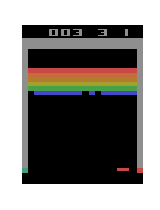
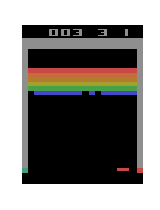
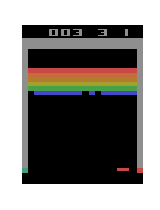
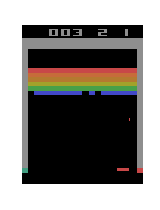
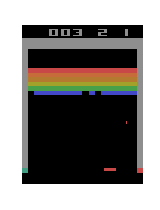
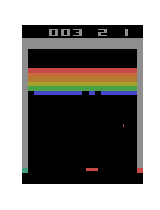
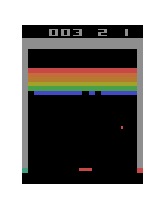
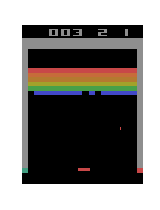
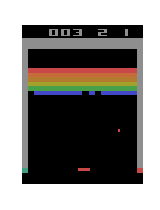
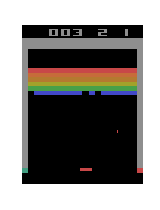
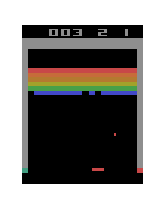
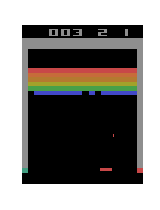
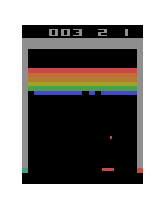
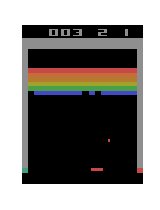
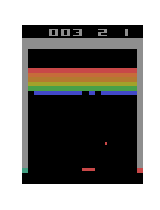
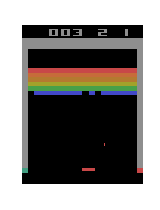
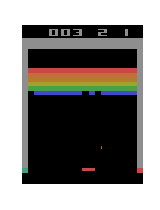
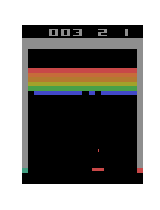
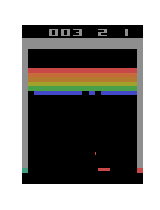
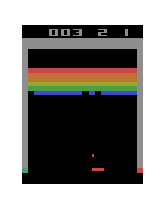
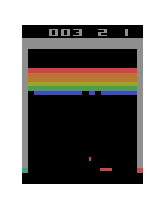
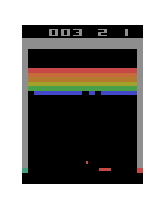
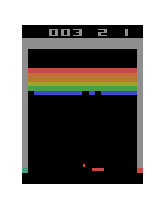
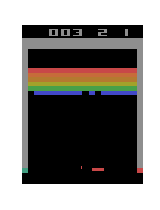
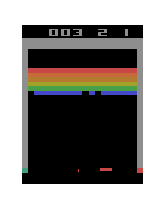
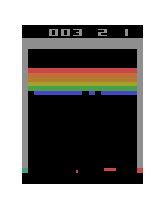
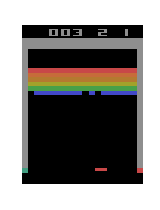
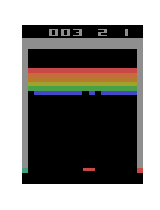
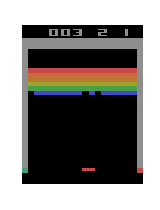
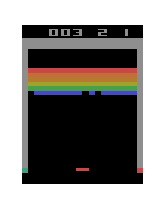
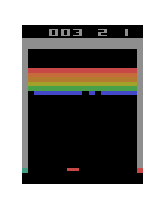
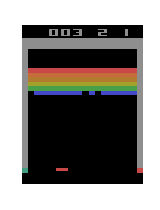
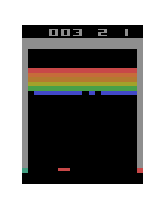
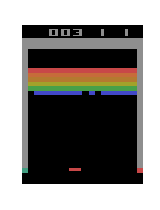
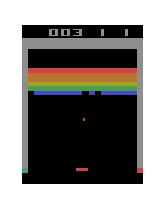
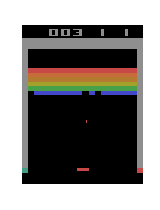
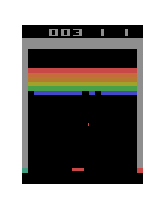
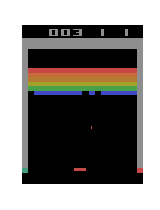
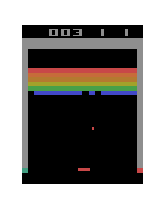
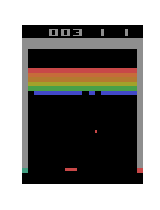
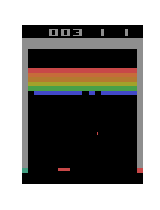
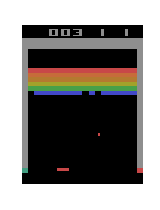
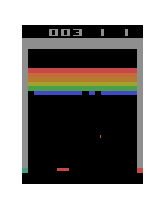
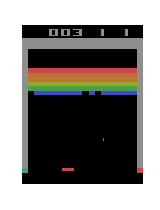
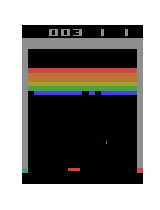
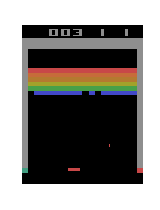
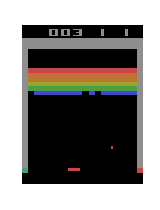
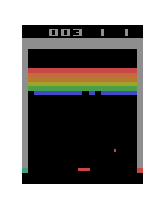
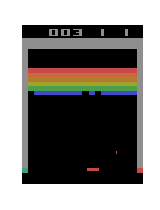
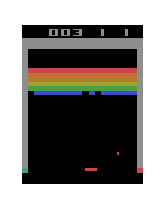
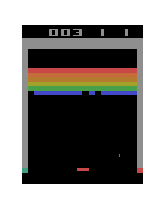
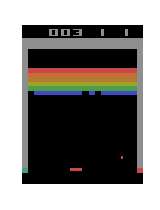
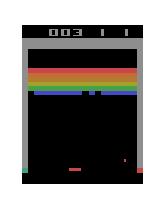
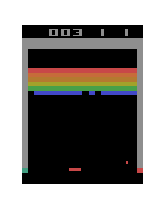
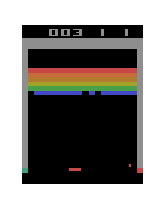
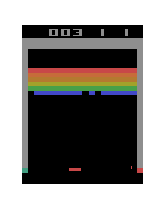
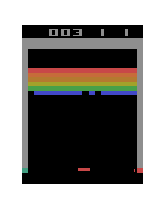
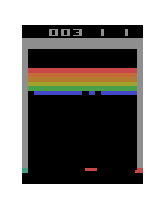
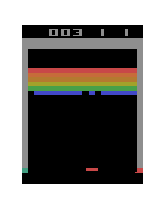
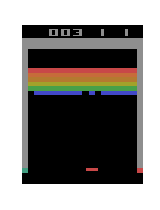
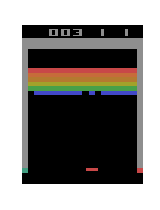
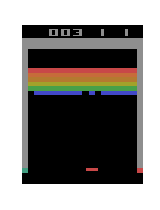
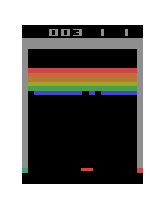
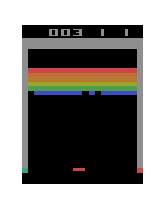
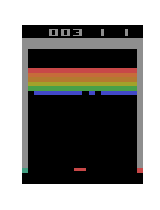
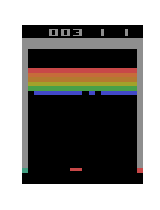
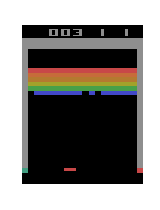

In [9]:
# 아무렇게나 플레이하기

frames = []  # 프레임 이미지를 저장할 변수
observation = env.reset()  # 환경 초기화

for step in range(1000):  # 최대 1000에피소드까지 반복
    frames.append(observation)  # 이미지를 변환하지 않고 그대로 저장
    action = np.random.randint(0, 4)  # 무작위로 0~3 중에서 행동을 선택
    observation_next, reward, done, info = env.step(action)  # 행동 실행

    observation = observation_next  # 상태 업데이트

    if done:  # 게임이 끝나면 반복문 탈출
        break

display_frames_as_gif(frames)  # 애니메이션을 생성하여 저장


In [7]:
# 이것으로 아무렇게나 플레이하도록 하는 코드를 완성하였다
# 이를 바탕으로 강화학습을 적용한다
